虽然 Seaborn 主要用于绘图，但你可以通过 matplotlib 的 table() 函数绘制表格，并使用 seaborn 设置样式和美化效果。

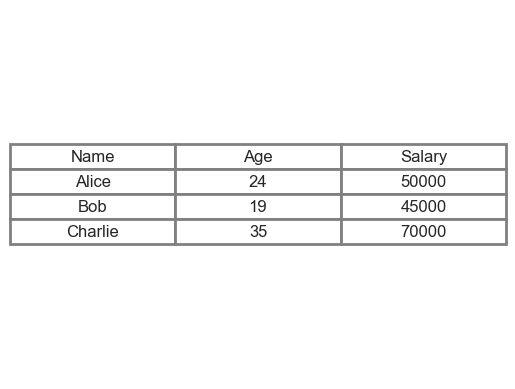

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置 seaborn 的样式
sns.set(style="whitegrid")

# 示例数据
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [24, 19, 35],
        'Salary': [50000, 45000, 70000]}

df = pd.DataFrame(data)

#print(df)

# 创建一个 matplotlib 图形
fig, ax = plt.subplots()

# 隐藏坐标轴
ax.axis('off')

# 绘制表格
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')


# 美化表格：为表头和数据行设置不同的背景颜色
for key, cell in table.get_celld().items():
    # 设置边框颜色
    cell.set_edgecolor('gray')  # 边框颜色为灰色
    cell.set_linewidth(2)  # 边框宽度为1

    # 设置文本居中
    cell.set_text_props(ha='center', va='center')  # 文本水平和垂直居中
    
    # 设置不同的背景色
    if key[0] == 0:  # 表头的背景色
        cell.set_facecolor(sns.color_palette("Blues", 1)[0])  # 使用seaborn配色
        cell.set_text_props(weight='bold')  # 表头字体加粗
    else:
        # 数据行的背景色，交替颜色
        if key[1] % 2 == 0:
            cell.set_facecolor(sns.color_palette("YlGnBu", 1)[0])  # 使用seaborn调色板
        else:
            cell.set_facecolor(sns.color_palette("Wistia", 1)[0])

# 调整表格的尺寸
table.scale(1, 1.5)

# 显示表格
plt.show()


使用 seaborn 的色彩调色板
你可以用 seaborn 提供的调色板功能，来设置表格单元格的背景颜色或者文本颜色。下面是一个示例，展示如何通过 seaborn 的色彩调色板来手动美化表格。

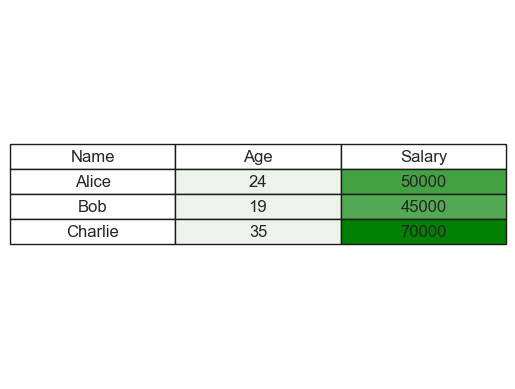

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import Normalize

# 使用 seaborn 的渐变调色板
palette = sns.light_palette("green", as_cmap=True)

# 示例数据
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [24, 19, 35],
        'Salary': [50000, 45000, 70000]}

df = pd.DataFrame(data)

# 创建一个 matplotlib 图形
fig, ax = plt.subplots()
ax.axis('off')

# 绘制表格
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# 对数值列应用颜色
numeric_columns = ['Age', 'Salary']
numeric_values = df[numeric_columns].values

# 标准化数值数据
norm = Normalize(vmin=numeric_values.min(), vmax=numeric_values.max())

# 设置单元格颜色，忽略字符串列
for i in range(len(df)):
    for j, column in enumerate(df.columns):
        cell_value = df.iloc[i, j]
        cell = table[(i + 1, j)]  # 从 1 开始是为了避开表头
        if column in numeric_columns:
            # 标准化数值并获取颜色
            color = palette(norm(cell_value))
            cell.set_facecolor(color)
        else:
            # 非数值列不应用颜色
            cell.set_facecolor('white')

# 调整表格尺寸
table.scale(1, 1.5)

plt.show()



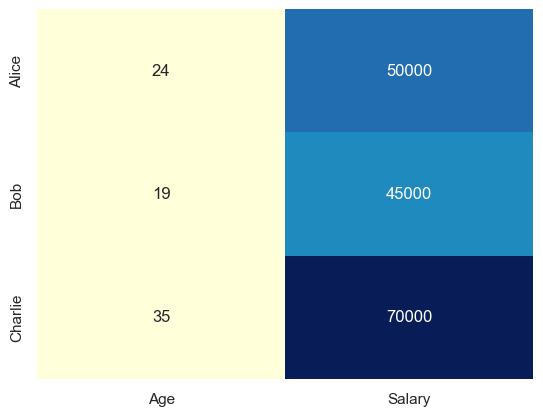

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置 seaborn 的调色板
cmap = sns.light_palette("green", as_cmap=True)

# 示例数据
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [24, 19, 35],
        'Salary': [50000, 45000, 70000]}

df = pd.DataFrame(data)

# 创建一个 matplotlib 图形
fig, ax = plt.subplots()

# 隐藏坐标轴
ax.axis('off')

# 绘制表格
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# 设置表格的背景颜色
for i in range(len(df)):
    for j in range(len(df.columns)):
        cell = table[(i+1, j)]  # 表头从0开始，数据从1开始
        cell.set_facecolor(cmap(df.values[i, j]/max(df.values.flatten())))

# 调整表格的尺寸
table.scale(1, 1.5)

# 显示表格
plt.show()


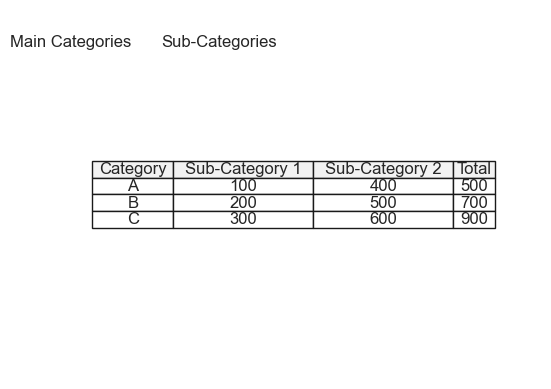

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 示例数据
data = {
    'Category': ['A', 'B', 'C'],
    'Sub-Category 1': [100, 200, 300],
    'Sub-Category 2': [400, 500, 600],
    'Total': [500, 700, 900]
}

df = pd.DataFrame(data)

# 创建图形
fig, ax = plt.subplots()

# 隐藏坐标轴
ax.axis('tight')
ax.axis('off')

# 绘制表格
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# 设置列宽比例
table.auto_set_column_width([0, 1, 2, 3])

# 设置表头背景颜色
for j in range(len(df.columns)):
    table[(0, j)].set_facecolor("#f2f2f2")

# 合并特定单元格：例如合并 "Sub-Category 1" 和 "Sub-Category 2"
# 使用 annotation 绘制额外的文字作为表头
ax.annotate('Sub-Categories', xy=(0.35, 0.9), xycoords='axes fraction', fontsize=12, ha='center')
ax.annotate('Main Categories', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, ha='center')

# 显示图形
plt.show()
